<a href="https://colab.research.google.com/github/kimimumemo/Kapita-Selekta-Matematika-Terapan/blob/main/Sentiment%20Analysis%20of%20Customer%20Reviews%20in%20Zomato%20from%20Michelin%20Star%20in%20London.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 8**

Anggota Kelompok

1. Nadia Ingrida/6161801007
2. Devina Gabriella/6161801009
3. Stevanny Budiana/6161801026
4. Kimberley Blessinda/6161801028



# **Dependencies, Data & Visualization**

Instalasi

In [ ]:
pip install scattertext

Data

In [ ]:
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call('apt-get install subversion'.split())
    subprocess.call('svn export https://github.com/kimimumemo/Kapita-Selekta-Matematika-Terapan/trunk/data.zip'.split())

!unzip "/content/data.zip" -d "/content"

Archive:  /content/data.zip
  inflating: /content/data_kapsel.csv  
  inflating: /content/__MACOSX/._data_kapsel.csv  


In [ ]:
import pandas as pd
df = pd.read_csv('data_kapsel.csv')

In [ ]:
df

,No,UserID,Score,Review,Text
0,1,Peter Pan,5.0,Good,"Ample portions, fresh dishes and ingredients, ..."
1,2,Modyfoody,4.5,Good,"Excellent place. Delicious, beautifully presen..."
2,3,Foodie,5.0,Good,Amazing place. Loved everything we had. Polite...
3,4,Rapha Espírito Santo,5.0,Good,Amazing place in London. I love the food. can’...
4,5,Dish To Serve,4.0,Good,The presentation was extremely good the ambien...
...,...,...,...,...,...
195,196,Artisan Traveller,5.0,Good,I owe a lot to Gordon Ramsay. Back in the peri...
196,197,Ranjana Syal,5.0,Good,A restaurant with such a famous celebrity scot...
197,198,Zahira Dahyr,4.0,Good,First time at this restaurant was a birthday t...
198,199,Deux_bon_vivants_lx,5.0,Good,Have you imagine to cook in the famous kitchen...


Import Library

In [ ]:
%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))

**Load** Spacy

In [ ]:
import spacy
nlp = spacy.load('en')

Parse Speech text using Spacy

In [ ]:
df['parsed'] = df.Text.apply(nlp)

In [ ]:
df.head()

,No,UserID,Score,Review,Text,parsed
0,1,Peter Pan,5.0,Good,"Ample portions, fresh dishes and ingredients, ...","(Ample, portions, ,, fresh, dishes, and, ingre..."
1,2,Modyfoody,4.5,Good,"Excellent place. Delicious, beautifully presen...","(Excellent, place, ., Delicious, ,, beautifull..."
2,3,Foodie,5.0,Good,Amazing place. Loved everything we had. Polite...,"(Amazing, place, ., Loved, everything, we, had..."
3,4,Rapha Espírito Santo,5.0,Good,Amazing place in London. I love the food. can’...,"(Amazing, place, in, London, ., I, love, the, ..."
4,5,Dish To Serve,4.0,Good,The presentation was extremely good the ambien...,"(The, presentation, was, extremely, good, the,..."


Count of Good and Bad Review

In [ ]:
print("Document Count")
print(df.groupby('Review')['Text'].count())
print("Word Count")
df.groupby('Review').apply(lambda x: x.Text.apply(lambda x: len(x.split())).sum())

Document Count
Review
Bad      62
Good    138
Name: Text, dtype: int64
Word Count


Review
Bad      5354
Good    13397
dtype: int64

Convert Dataframe into Scattertext Corpus

In [ ]:
corpus = st.CorpusFromParsedDocuments(df, category_col='Review', parsed_col='parsed').build()

Visualize Chart

In [ ]:
html = st.produce_scattertext_explorer(corpus,
                                       category = 'Good',
                                       category_name='Good', 
                                       not_category_name='Bad',
                                       width_in_pixels=1000, 
                                       minimum_term_frequency=5, 
                                       metadata=df['UserID'])
file_name = 'MichelinScattertextScale.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

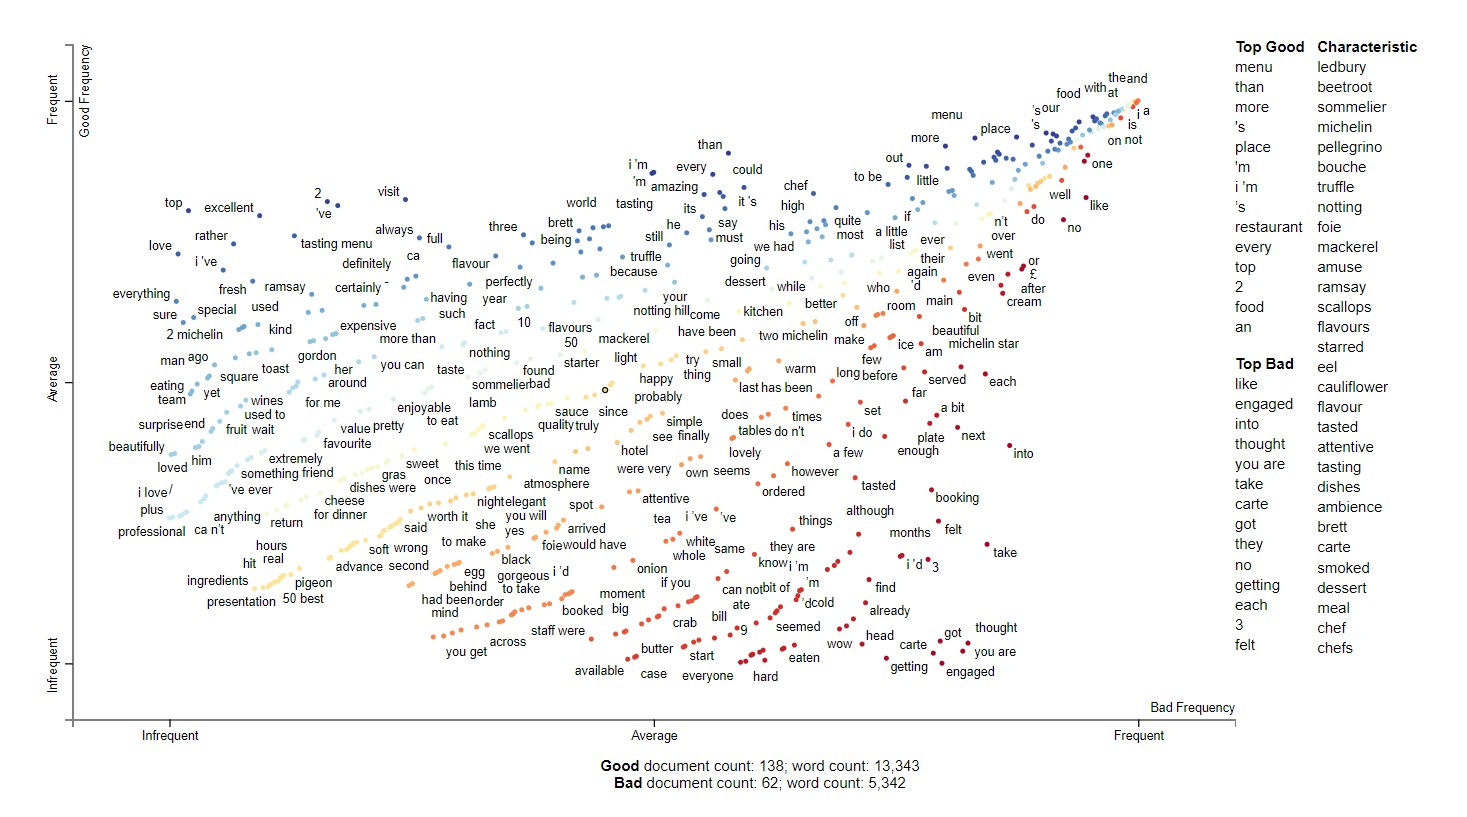

In [ ]:
html = st.produce_scattertext_explorer(corpus,
                                       category='Good',
                                       category_name='Good',
                                       not_category_name='Bad',
                                       minimum_term_frequency=5,
                                       width_in_pixels=1000,
                                       transform=st.Scalers.log_scale_standardize)
file_name = 'MichelinScattertextLog.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

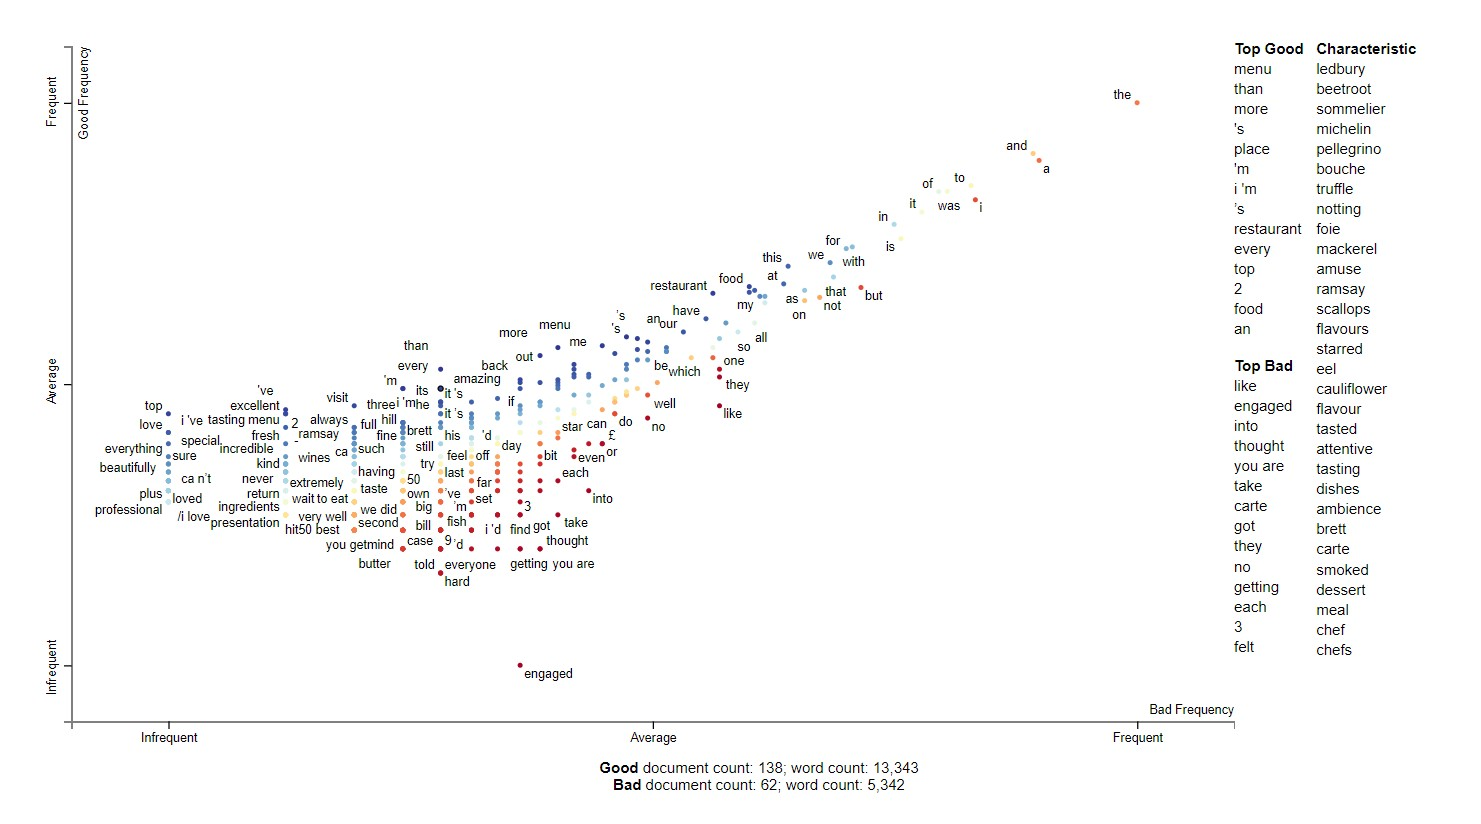

In [ ]:
html = produce_scattertext_explorer(corpus,
                                    category='Good',
                                    category_name='Good',
                                    not_category_name='Bad',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.percentile,
                                    metadata=df['UserID'])
file_name = 'MichelinScattertextRankData.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

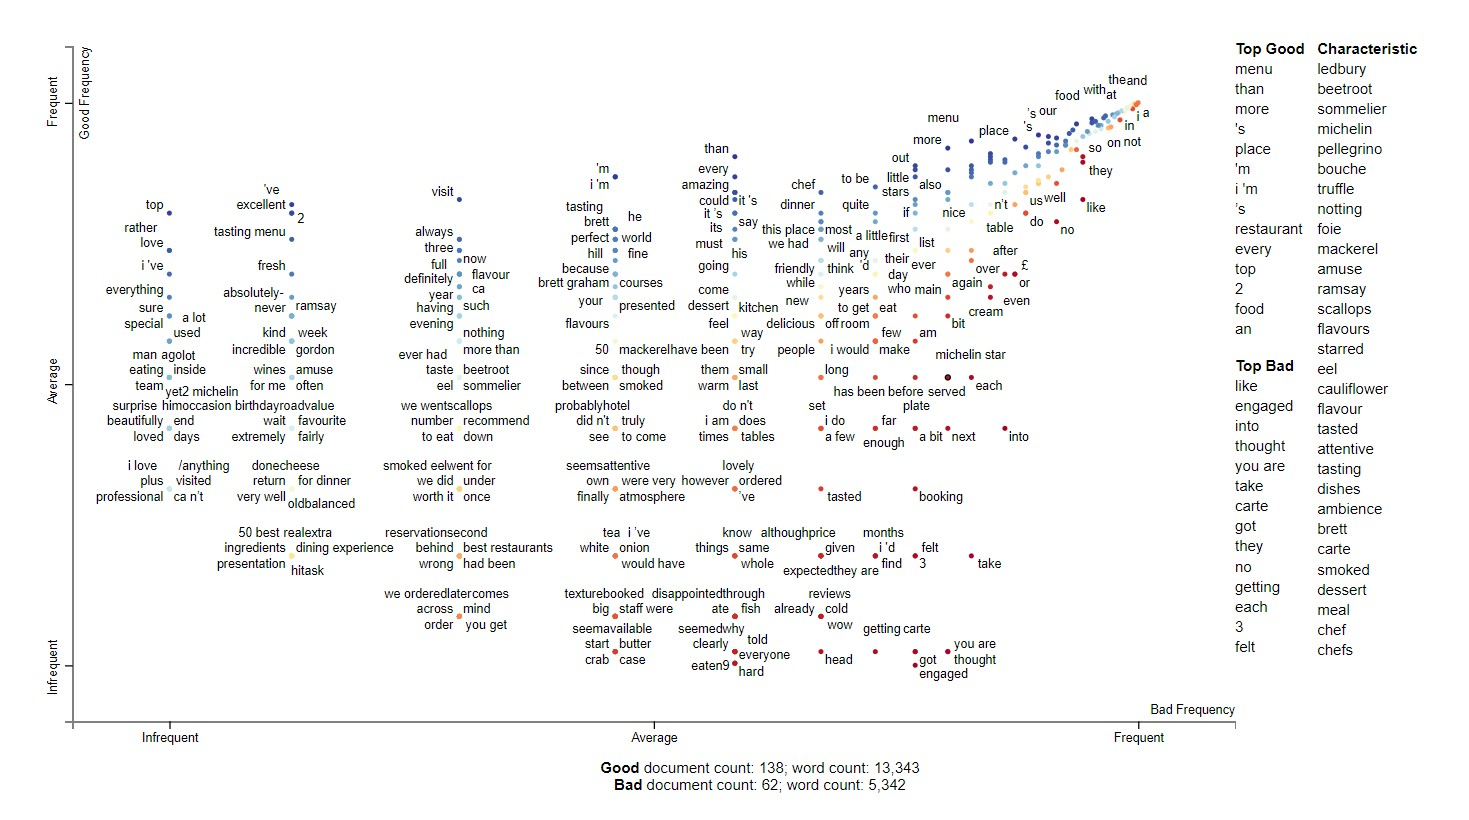

# **Preprocessing**

In [ ]:
!pip install nltk==3.5

     |████████████████████████████████| 1.4 MB 9.9 MB/s 
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434688 sha256=8f40b8e16387942f04d813bcffcfa11ae22d0efe3b59c7c8a50af57ea59225e9
  Stored in directory: /root/.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


**Import NLTK**

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Case Folding**

In [ ]:
i=0
Teks = ''
while i<len(df):
  Teks = Teks + ' ' + df.Text[i]
  i=i+1

In [ ]:
lower_Teks = Teks.lower()

**Tokenizing**

In [ ]:
import string 
import re #regex library
from nltk.tokenize import word_tokenize 

In [ ]:
#remove angka
lower_Teks = re.sub(r"\d+", "", lower_Teks)

In [ ]:
#remove punctuation
lower_Teks = lower_Teks.translate(str.maketrans("","",string.punctuation))

In [ ]:
#remove whitespace leading & trailing
lower_Teks = lower_Teks.strip()

In [ ]:
#remove multiple whitespace into single whitespace
lower_Teks = re.sub('\s+',' ',lower_Teks)

In [ ]:
tokens = nltk.tokenize.word_tokenize(lower_Teks)

print('Tokenizing Result : \n') 
print(tokens)

Tokenizing Result : 

['ample', 'portions', 'fresh', 'dishes', 'and', 'ingredients', 'kind', 'service', 'and', 'mouthwatering', 'food', 'plus', 'its', 'never', 'really', 'crowded', 'excellent', 'place', 'delicious', 'beautifully', 'presented', 'food', 'items', 'with', 'the', 'freshest', 'ingredients', 'and', 'optimal', 'hygienic', 'conditions', 'the', 'staff', 'is', 'highly', 'professional', 'and', 'friendly', 'and', 'the', 'service', 'is', 'prompt', 'and', 'punctual', 'too', 'amazing', 'place', 'loved', 'everything', 'we', 'had', 'polite', 'staff', 'and', 'will', 'definitely', 'visit', 'again', 'to', 'try', 'more', 'highly', 'recommended', 'amazing', 'place', 'in', 'london', 'i', 'love', 'the', 'food', 'can', '’', 't', 'wait', 'to', 'come', 'back', 'here', 'again', 'congratulations', 'to', 'the', 'staff', 'the', 'presentation', 'was', 'extremely', 'good', 'the', 'ambiences', 'was', 'lit', 'and', 'so', 'was', 'the', 'food', 'you', 'have', 'to', 'check', 'out', 'ghis', 'place', 'in', 'n

**Frekuensi Kata**

In [ ]:
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

In [ ]:
freq_tokens = nltk.FreqDist(tokens)

print('Frequency Tokens : \n') 
print(freq_tokens.most_common())

Frequency Tokens : 

[('the', 1117), ('and', 608), ('a', 582), ('to', 414), ('of', 375), ('was', 372), ('i', 317), ('it', 278), ('in', 260), ('is', 230), ('with', 201), ('for', 196), ('we', 162), ('this', 153), ('that', 148), ('but', 147), ('’', 142), ('at', 128), ('as', 128), ('not', 123), ('food', 120), ('on', 118), ('were', 117), ('had', 112), ('ledbury', 112), ('my', 112), ('restaurant', 107), ('you', 98), ('all', 87), ('have', 84), ('very', 83), ('so', 79), ('service', 72), ('our', 72), ('s', 71), ('good', 66), ('an', 62), ('which', 62), ('be', 59), ('are', 58), ('just', 57), ('from', 57), ('one', 57), ('place', 56), ('london', 56), ('michelin', 56), ('best', 52), ('they', 52), ('menu', 52), ('by', 52), ('its', 49), ('there', 48), ('more', 47), ('been', 47), ('like', 45), ('me', 45), ('some', 45), ('restaurants', 43), ('lunch', 43), ('really', 42), ('two', 41), ('when', 41), ('time', 41), ('has', 40), ('dish', 40), ('only', 39), ('about', 39), ('dishes', 38), ('staff', 37), ('than

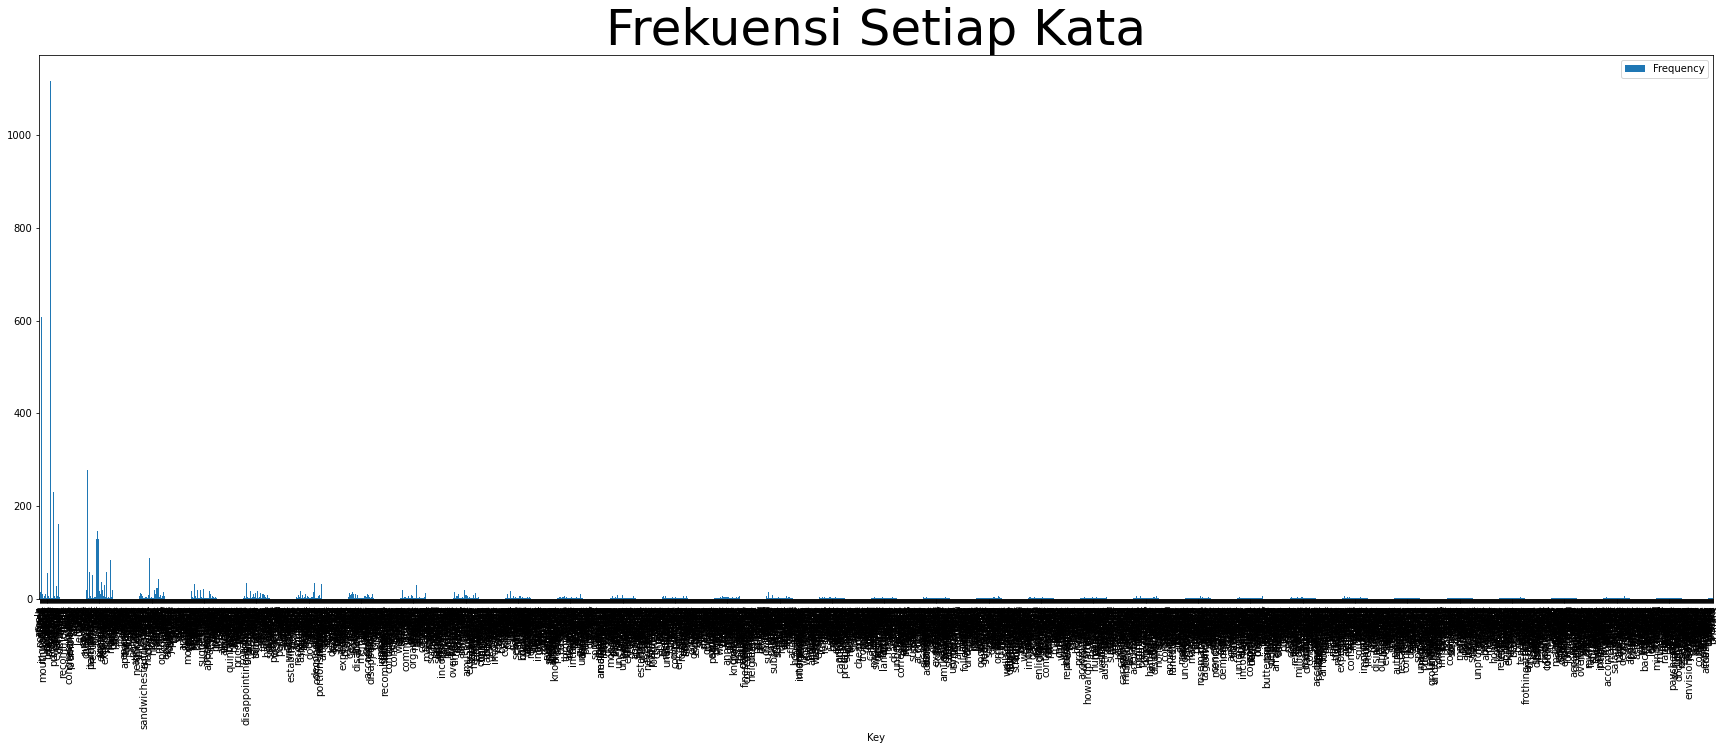

In [ ]:
df_freq_tokens = pd.DataFrame.from_dict(freq_tokens, orient='index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

ax = df_freq_tokens.plot(kind='bar',figsize = (30,10),title='Frekuensi Setiap Kata')
ax.title.set_size(50)


**Filtering**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# tokenize text
freq_tokens

list_stopwords = set(stopwords.words('english'))

#remove stopword pada list token
tokens_without_stopword = [word for word in freq_tokens if not word in list_stopwords]

**Stemming**

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
stemmer = PorterStemmer()

In [ ]:
# token without stopword
list_tokens = tokens_without_stopword

# stem
output   = [(token + " : " + stemmer.stem(token)) for token in list_tokens]

In [ ]:
output

['’ : ’',
 'food : food',
 'ledbury : ledburi',
 'restaurant : restaur',
 'service : servic',
 'good : good',
 'one : one',
 'place : place',
 'london : london',
 'michelin : michelin',
 'best : best',
 'menu : menu',
 'like : like',
 'restaurants : restaur',
 'lunch : lunch',
 'really : realli',
 'two : two',
 'time : time',
 'dish : dish',
 'dishes : dish',
 'staff : staff',
 'dining : dine',
 'well : well',
 'meal : meal',
 'experience : experi',
 'little : littl',
 'us : us',
 'go : go',
 'back : back',
 'get : get',
 'would : would',
 'table : tabl',
 'every : everi',
 'also : also',
 'great : great',
 'nice : nice',
 'im : im',
 'stars : star',
 'amazing : amaz',
 'quite : quit',
 'wine : wine',
 'star : star',
 'course : cours',
 'went : went',
 'dinner : dinner',
 'first : first',
 '£ : £',
 'chef : chef',
 'visit : visit',
 'ever : ever',
 'say : say',
 'many : mani',
 'even : even',
 'could : could',
 'list : list',
 'high : high',
 'made : made',
 'cream : cream',
 'much : m

**Text Visualization**

In [ ]:
text=''
for t in output:
  text += str(t) + ' '

In [ ]:
text

'’ : ’ food : food ledbury : ledburi restaurant : restaur service : servic good : good one : one place : place london : london michelin : michelin best : best menu : menu like : like restaurants : restaur lunch : lunch really : realli two : two time : time dish : dish dishes : dish staff : staff dining : dine well : well meal : meal experience : experi little : littl us : us go : go back : back get : get would : would table : tabl every : everi also : also great : great nice : nice im : im stars : star amazing : amaz quite : quit wine : wine star : star course : cours went : went dinner : dinner first : first £ : £ chef : chef visit : visit ever : ever say : say many : mani even : even could : could list : list high : high made : made cream : cream much : much excellent : excel top : top perfect : perfect tasting : tast day : day must : must friendly : friendli hill : hill brett : brett fine : fine main : main think : think always : alway worth : worth world : world bread : bread bit :

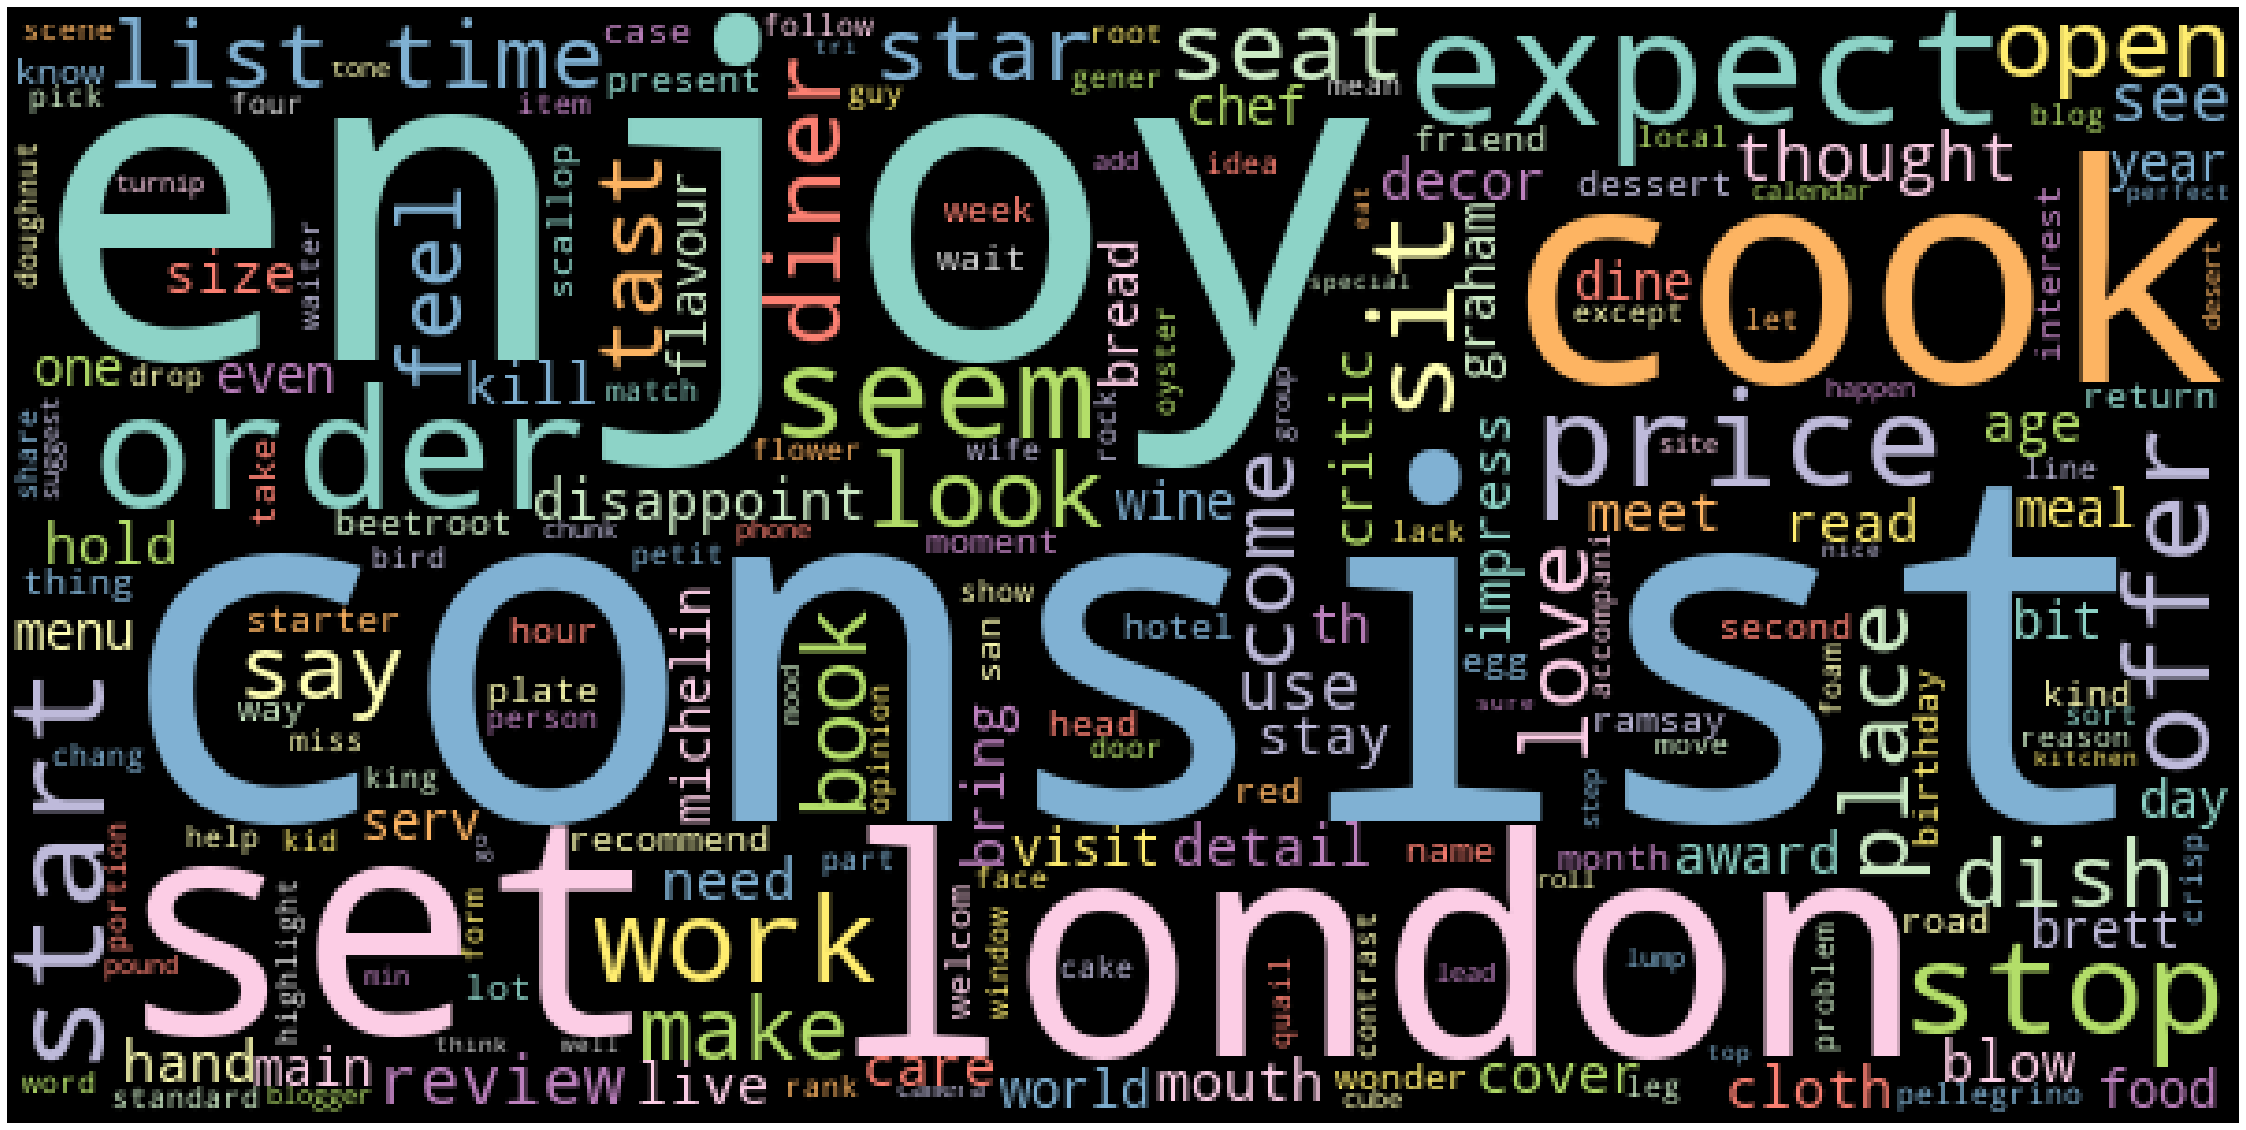

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
# stopwords is a collection of words that dont convey meaning. mostly pronouns such as he she etc.
def generate_better_wordcloud(data, title, mask=None):
  wordcloud = WordCloud(width = 600, 
                      height = 300, 
                      colormap = 'Set3',
                      random_state=1, 
                      background_color='black', 
                      collocations=True, 
                      stopwords = STOPWORDS).generate_from_text(text)
  plt.figure(figsize=(40, 30))
  # Display image
  plt.imshow(wordcloud) 
  # No axis 
  plt.axis("off")
  plt.show()

generate_better_wordcloud(text, 'Ulasan')